<a href="https://colab.research.google.com/github/ZZZ-winner/finrl/blob/main/1-Introduction/FinRL_Ensemble_StockTrading_ICAIF_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a target="_blank" href="https://colab.research.google.com/github/AI4Finance-Foundation/FinRL-Tutorials/blob/master/1-Introduction/FinRL_Ensemble_StockTrading_ICAIF_2020.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Deep Reinforcement Learning for Stock Trading from Scratch: Multiple Stock Trading Using Ensemble Strategy

Tutorials to use OpenAI DRL to trade multiple stocks using ensemble strategy in one Jupyter Notebook | Presented at ICAIF 2020

* This notebook is the reimplementation of our paper: Deep Reinforcement Learning for Automated Stock Trading: An Ensemble Strategy, using FinRL.
* Check out medium blog for detailed explanations: https://medium.com/@ai4finance/deep-reinforcement-learning-for-automated-stock-trading-f1dad0126a02
* Please report any issues to our Github: https://github.com/AI4Finance-LLC/FinRL-Library/issues
* **Pytorch Version**



# Content

* [1. Problem Definition](#0)
* [2. Getting Started - Load Python packages](#1)
    * [2.1. Install Packages](#1.1)    
    * [2.2. Check Additional Packages](#1.2)
    * [2.3. Import Packages](#1.3)
    * [2.4. Create Folders](#1.4)
* [3. Download Data](#2)
* [4. Preprocess Data](#3)        
    * [4.1. Technical Indicators](#3.1)
    * [4.2. Perform Feature Engineering](#3.2)
* [5.Build Environment](#4)  
    * [5.1. Training & Trade Data Split](#4.1)
    * [5.2. User-defined Environment](#4.2)   
    * [5.3. Initialize Environment](#4.3)    
* [6.Implement DRL Algorithms](#5)  
* [7.Backtesting Performance](#6)  
    * [7.1. BackTestStats](#6.1)
    * [7.2. BackTestPlot](#6.2)   
    * [7.3. Baseline Stats](#6.3)   
    * [7.3. Compare to Stock Market Index](#6.4)             

<a id='0'></a>
# Part 1. Problem Definition

This problem is to design an automated trading solution for single stock trading. We model the stock trading process as a Markov Decision Process (MDP). We then formulate our trading goal as a maximization problem.

The algorithm is trained using Deep Reinforcement Learning (DRL) algorithms and the components of the reinforcement learning environment are:


* Action: The action space describes the allowed actions that the agent interacts with the
environment. Normally, a ∈ A includes three actions: a ∈ {−1, 0, 1}, where −1, 0, 1 represent
selling, holding, and buying one stock. Also, an action can be carried upon multiple shares. We use
an action space {−k, ..., −1, 0, 1, ..., k}, where k denotes the number of shares. For example, "Buy
10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or −10, respectively

* Reward function: r(s, a, s′) is the incentive mechanism for an agent to learn a better action. The change of the portfolio value when action a is taken at state s and arriving at new state s',  i.e., r(s, a, s′) = v′ − v, where v′ and v represent the portfolio
values at state s′ and s, respectively

* State: The state space describes the observations that the agent receives from the environment. Just as a human trader needs to analyze various information before executing a trade, so
our trading agent observes many different features to better learn in an interactive environment.

* Environment: Dow 30 consituents


The data of the single stock that we will be using for this case study is obtained from Yahoo Finance API. The data contains Open-High-Low-Close price and volume.


<a id='1'></a>
# Part 2. Getting Started- Load Python Packages

<a id='1.1'></a>
## 2.1. Install all the packages through FinRL library


In [1]:
# ## install finrl library
!pip install wrds
!pip install swig
!pip install -q condacolab
import condacolab
condacolab.install()
!apt-get update -y -qq && apt-get install -y -qq cmake libopenmpi-dev python3-dev zlib1g-dev libgl1-mesa-glx swig
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git

  Using cached swig-4.3.0-py2.py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.whl.metadata (3.5 kB)
Using cached swig-4.3.0-py2.py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.9 MB)
✨🍰✨ Everything looks OK!
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
  Cloning https://github.com/AI4Finance-Foundation/FinRL.git to /tmp/pip-req-build-ctt4lkko
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/FinRL.git /tmp/pip-req-build-ctt4lkko
  Resolved https://github.com/AI4Finance-Foundation/FinRL.git to commit df93fa44021d206274847faff744ca9f51891d7c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-xiv6hdlz/elegantrl_9d6e798438d34ed9999


<a id='1.2'></a>
## 2.2. Check if the additional packages needed are present, if not install them.
* Yahoo Finance API
* pandas
* numpy
* matplotlib
* stockstats
* OpenAI gym
* stable-baselines
* tensorflow
* pyfolio

In [2]:
pip install yfinance pandas numpy matplotlib stockstats gym stable-baselines pyfolio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 16.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.1 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827628 sha256=dc86ab80e5585c1b56ab66a94b8689842c3f0b09ca15213626f8df7200915d46
  Stored in directory: /root/.cache/pip/wheels/b9/22/6d/3e7b32d98451b4cd9d12417052affbeeeea012955d437da1da
Successfully built gym
  Attempting uninstall: pygame
    Found existing installation: pygame 2.6.1
    Uninstalling pygame-2.6.1:
      Successfully uninstalled pygame-2.6.1
  Attempting uninstall: ale-py
    Found existing installation: ale-py 0.10.1
    Uninstalling ale-py-0.10.1:
      S

In [4]:
pip install --upgrade pandas


<a id='1.3'></a>
## 2.3. Import Packages

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.config_tickers import DOW_30_TICKER
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent,DRLEnsembleAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

from pprint import pprint

import sys
sys.path.append("../FinRL-Library")

import itertools

<a id='1.4'></a>
## 2.4. Create Folders

In [7]:
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)

check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

<a id='2'></a>
# Part 3. Download Data
Yahoo Finance is a website that provides stock data, financial news, financial reports, etc. All the data provided by Yahoo Finance is free.
* FinRL uses a class **YahooDownloader** to fetch data from Yahoo Finance API
* Call Limit: Using the Public API (without authentication), you are limited to 2,000 requests per hour per IP (or up to a total of 48,000 requests a day).




-----
class YahooDownloader:
    Provides methods for retrieving daily stock data from
    Yahoo Finance API

    Attributes
    ----------
        start_date : str
            start date of the data (modified from config.py)
        end_date : str
            end date of the data (modified from config.py)
        ticker_list : list
            a list of stock tickers (modified from config.py)

    Methods
    -------
    fetch_data()
        Fetches data from yahoo API


In [8]:
print(DOW_30_TICKER)

['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW']


In [10]:
import yfinance as yf
TRAIN_START_DATE = '2009-01-01'
TRAIN_END_DATE = '2019-01-01'
TEST_START_DATE = '2019-01-01'
TEST_END_DATE = '2021-01-01'

import pandas as pd

# 定义你的股票列表，起止日期
tickers = DOW_30_TICKER  # 你的股票代码列表
start_date = TRAIN_START_DATE  # 训练开始日期
end_date = TEST_END_DATE  # 测试结束日期

# 初始化一个空的DataFrame用于存储数据
data_df = pd.DataFrame()

# 获取每个股票的数据并合并
for ticker in tickers:
    temp_df = yf.download(ticker, start=start_date, end=end_date)

    if temp_df.empty:
        continue

    # 打印列名，检查是否有 MultiIndex
    print(f"Columns for {ticker}: {temp_df.columns}")

    # 将列从 MultiIndex 转换为单层索引
    temp_df.columns = [col[0] for col in temp_df.columns]  # 只保留 `Price` 部分

    # 重置索引，使日期变为一列
    temp_df = temp_df.reset_index()

    # 添加股票代码列
    temp_df["tic"] = ticker

    # 如果有 "Adj Close" 列，使用它
    if 'Adj Close' in temp_df.columns:
        temp_df["close"] = temp_df["Adj Close"]
        temp_df = temp_df.drop(columns=["Adj Close"])
    else:
        # 如果没有 "Adj Close" 列，可以直接使用 "Close" 列
        temp_df["close"] = temp_df["Close"]

    # 添加日期列（星期几）
    temp_df["day"] = temp_df["Date"].dt.dayofweek  # 使用 reset_index 后的 "Date" 列
    # 转换日期格式（字符串）
    temp_df["date"] = temp_df["Date"].dt.strftime('%Y-%m-%d')

    # 合并数据
    data_df = pd.concat([data_df, temp_df], axis=0)

# 清理数据：去掉缺失值，排序等
data_df = data_df.dropna()
data_df = data_df.sort_values(by=["date", "tic"]).reset_index(drop=True)

# 输出数据的形状和部分内容
print(data_df.head())

# 返回最终的DataFrame




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Columns for AXP: MultiIndex([( 'Close', 'AXP'),
            (  'High', 'AXP'),
            (   'Low', 'AXP'),
            (  'Open', 'AXP'),
            ('Volume', 'AXP')],
           names=['Price', 'Ticker'])
Columns for AMGN: MultiIndex([( 'Close', 'AMGN'),
            (  'High', 'AMGN'),
            (   'Low', 'AMGN'),
            (  'Open', 'AMGN'),
            ('Volume', 'AMGN')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed


Columns for AAPL: MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed


Columns for BA: MultiIndex([( 'Close', 'BA'),
            (  'High', 'BA'),
            (   'Low', 'BA'),
            (  'Open', 'BA'),
            ('Volume', 'BA')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Columns for CAT: MultiIndex([( 'Close', 'CAT'),
            (  'High', 'CAT'),
            (   'Low', 'CAT'),
            (  'Open', 'CAT'),
            ('Volume', 'CAT')],
           names=['Price', 'Ticker'])
Columns for CSCO: MultiIndex([( 'Close', 'CSCO'),
            (  'High', 'CSCO'),
            (   'Low', 'CSCO'),
            (  'Open', 'CSCO'),
            ('Volume', 'CSCO')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Columns for CVX: MultiIndex([( 'Close', 'CVX'),
            (  'High', 'CVX'),
            (   'Low', 'CVX'),
            (  'Open', 'CVX'),
            ('Volume', 'CVX')],
           names=['Price', 'Ticker'])


Columns for GS: MultiIndex([( 'Close', 'GS'),
            (  'High', 'GS'),
            (   'Low', 'GS'),
            (  'Open', 'GS'),
            ('Volume', 'GS')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed


Columns for HD: MultiIndex([( 'Close', 'HD'),
            (  'High', 'HD'),
            (   'Low', 'HD'),
            (  'Open', 'HD'),
            ('Volume', 'HD')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed


Columns for HON: MultiIndex([( 'Close', 'HON'),
            (  'High', 'HON'),
            (   'Low', 'HON'),
            (  'Open', 'HON'),
            ('Volume', 'HON')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Columns for IBM: MultiIndex([( 'Close', 'IBM'),
            (  'High', 'IBM'),
            (   'Low', 'IBM'),
            (  'Open', 'IBM'),
            ('Volume', 'IBM')],
           names=['Price', 'Ticker'])
Columns for INTC: MultiIndex([( 'Close', 'INTC'),
            (  'High', 'INTC'),
            (   'Low', 'INTC'),
            (  'Open', 'INTC'),
            ('Volume', 'INTC')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed


Columns for JNJ: MultiIndex([( 'Close', 'JNJ'),
            (  'High', 'JNJ'),
            (   'Low', 'JNJ'),
            (  'Open', 'JNJ'),
            ('Volume', 'JNJ')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed


Columns for KO: MultiIndex([( 'Close', 'KO'),
            (  'High', 'KO'),
            (   'Low', 'KO'),
            (  'Open', 'KO'),
            ('Volume', 'KO')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed


Columns for JPM: MultiIndex([( 'Close', 'JPM'),
            (  'High', 'JPM'),
            (   'Low', 'JPM'),
            (  'Open', 'JPM'),
            ('Volume', 'JPM')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed


Columns for MCD: MultiIndex([( 'Close', 'MCD'),
            (  'High', 'MCD'),
            (   'Low', 'MCD'),
            (  'Open', 'MCD'),
            ('Volume', 'MCD')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed


Columns for MMM: MultiIndex([( 'Close', 'MMM'),
            (  'High', 'MMM'),
            (   'Low', 'MMM'),
            (  'Open', 'MMM'),
            ('Volume', 'MMM')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed


Columns for MRK: MultiIndex([( 'Close', 'MRK'),
            (  'High', 'MRK'),
            (   'Low', 'MRK'),
            (  'Open', 'MRK'),
            ('Volume', 'MRK')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed


Columns for MSFT: MultiIndex([( 'Close', 'MSFT'),
            (  'High', 'MSFT'),
            (   'Low', 'MSFT'),
            (  'Open', 'MSFT'),
            ('Volume', 'MSFT')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed


Columns for NKE: MultiIndex([( 'Close', 'NKE'),
            (  'High', 'NKE'),
            (   'Low', 'NKE'),
            (  'Open', 'NKE'),
            ('Volume', 'NKE')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Columns for PG: MultiIndex([( 'Close', 'PG'),
            (  'High', 'PG'),
            (   'Low', 'PG'),
            (  'Open', 'PG'),
            ('Volume', 'PG')],
           names=['Price', 'Ticker'])
Columns for TRV: MultiIndex([( 'Close', 'TRV'),
            (  'High', 'TRV'),
            (   'Low', 'TRV'),
            (  'Open', 'TRV'),
            ('Volume', 'TRV')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Columns for UNH: MultiIndex([( 'Close', 'UNH'),
            (  'High', 'UNH'),
            (   'Low', 'UNH'),
            (  'Open', 'UNH'),
            ('Volume', 'UNH')],
           names=['Price', 'Ticker'])
Columns for CRM: MultiIndex([( 'Close', 'CRM'),
            (  'High', 'CRM'),
            (   'Low', 'CRM'),
            (  'Open', 'CRM'),
            ('Volume', 'CRM')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Columns for VZ: MultiIndex([( 'Close', 'VZ'),
            (  'High', 'VZ'),
            (   'Low', 'VZ'),
            (  'Open', 'VZ'),
            ('Volume', 'VZ')],
           names=['Price', 'Ticker'])
Columns for V: MultiIndex([( 'Close', 'V'),
            (  'High', 'V'),
            (   'Low', 'V'),
            (  'Open', 'V'),
            ('Volume', 'V')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed


Columns for WBA: MultiIndex([( 'Close', 'WBA'),
            (  'High', 'WBA'),
            (   'Low', 'WBA'),
            (  'Open', 'WBA'),
            ('Volume', 'WBA')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed


Columns for WMT: MultiIndex([( 'Close', 'WMT'),
            (  'High', 'WMT'),
            (   'Low', 'WMT'),
            (  'Open', 'WMT'),
            ('Volume', 'WMT')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Columns for DIS: MultiIndex([( 'Close', 'DIS'),
            (  'High', 'DIS'),
            (   'Low', 'DIS'),
            (  'Open', 'DIS'),
            ('Volume', 'DIS')],
           names=['Price', 'Ticker'])
Columns for DOW: MultiIndex([( 'Close', 'DOW'),
            (  'High', 'DOW'),
            (   'Low', 'DOW'),
            (  'Open', 'DOW'),
            ('Volume', 'DOW')],
           names=['Price', 'Ticker'])
        Date      Close       High        Low       Open     Volume   tic  \
0 2009-01-02   2.733996   2.742734   2.565589   2.587280  746015200  AAPL   
1 2009-01-02  41.816154  41.879953  40.937156  41.532606    6547900  AMGN   
2 2009-01-02  15.014075  15.161653  14.291722  14.423765   10955700   AXP   
3 2009-01-02  33.941101  34.173627  32.088404  32.103406    7010200    BA   
4 2009-01-02  30.602573  30.648239  29.167364  29.297838    7117200   CAT   

       close  day        date  
0   2.733996    4  2009-01-02  
1  41.816154    4  2009-01-02  
2  15.014075    4  

In [11]:
# 调整列顺序
data_df = data_df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'tic', 'day']]
data_df.columns = data_df.columns.str.lower()
# 打印前五行查看结果
print(data_df.head())

        date       open       high        low      close     volume   tic  day
0 2009-01-02   2.587280   2.742734   2.565589   2.733996  746015200  AAPL    4
1 2009-01-02  41.532606  41.879953  40.937156  41.816154    6547900  AMGN    4
2 2009-01-02  14.423765  15.161653  14.291722  15.014075   10955700   AXP    4
3 2009-01-02  32.103406  34.173627  32.088404  33.941101    7010200    BA    4
4 2009-01-02  29.297838  30.648239  29.167364  30.602573    7117200   CAT    4


In [ ]:
df.head()

,date,open,high,low,close,volume,tic,day
0,2010-01-04,7.622500,7.660714,7.585000,6.505280,493729600,AAPL,0
1,2010-01-04,56.630001,57.869999,56.560001,42.888958,5277400,AMGN,0
2,2010-01-04,40.810001,41.099998,40.389999,33.675972,6894300,AXP,0
3,2010-01-04,55.720001,56.389999,54.799999,43.777546,6186700,BA,0
4,2010-01-04,57.650002,59.189999,57.509998,41.156914,7325600,CAT,0


In [ ]:
df.tail()

,date,open,high,low,close,volume,tic,day
97008,2023-02-28,482.670013,483.359985,473.920013,474.250854,3902100,UNH,1
97009,2023-02-28,220.000000,221.770004,219.500000,219.940002,5385400,V,1
97010,2023-02-28,38.700001,38.970001,38.549999,38.810001,16685300,VZ,1
97011,2023-02-28,35.480000,35.779999,35.320000,35.529999,8847000,WBA,1
97012,2023-02-28,141.000000,142.649994,140.949997,142.130005,6018000,WMT,1


In [12]:
data_df.tail()

,date,open,high,low,close,volume,tic,day
88056,2020-12-31,325.868550,331.582383,324.933538,331.195160,1969000,UNH,3
88057,2020-12-31,212.521547,213.903340,210.380765,212.842667,5922200,V,3
88058,2020-12-31,45.992100,46.578288,45.960414,46.538681,12906300,VZ,3
88059,2020-12-31,32.172548,32.720617,31.927141,32.622456,7696000,WBA,3
88060,2020-12-31,45.338745,45.360755,44.914287,45.323025,17814000,WMT,3


In [ ]:
df.shape

(97013, 8)

In [ ]:
df.sort_values(['date','tic']).head()

,date,open,high,low,close,volume,tic,day
0,2010-01-04,7.622500,7.660714,7.585000,6.505280,493729600,AAPL,0
1,2010-01-04,56.630001,57.869999,56.560001,42.888958,5277400,AMGN,0
2,2010-01-04,40.810001,41.099998,40.389999,33.675972,6894300,AXP,0
3,2010-01-04,55.720001,56.389999,54.799999,43.777546,6186700,BA,0
4,2010-01-04,57.650002,59.189999,57.509998,41.156914,7325600,CAT,0


In [13]:
data_df.sort_values(['date','tic']).head()

,date,open,high,low,close,volume,tic,day
0,2009-01-02,2.587280,2.742734,2.565589,2.733996,746015200,AAPL,4
1,2009-01-02,41.532606,41.879953,40.937156,41.816154,6547900,AMGN,4
2,2009-01-02,14.423765,15.161653,14.291722,15.014075,10955700,AXP,4
3,2009-01-02,32.103406,34.173627,32.088404,33.941101,7010200,BA,4
4,2009-01-02,29.297838,30.648239,29.167364,30.602573,7117200,CAT,4


In [14]:
len(data_df.tic.unique())

30

In [ ]:
len(df.tic.unique())

In [ ]:
df.tic.value_counts()

AAPL    3311
AMGN    3311
WMT     3311
WBA     3311
VZ      3311
V       3311
UNH     3311
TRV     3311
PG      3311
NKE     3311
MSFT    3311
MRK     3311
MMM     3311
MCD     3311
KO      3311
JPM     3311
JNJ     3311
INTC    3311
IBM     3311
HON     3311
HD      3311
GS      3311
DIS     3311
CVX     3311
CSCO    3311
CRM     3311
CAT     3311
BA      3311
AXP     3311
DOW      994
Name: tic, dtype: int64

In [15]:
data_df.tic.value_counts()

,count
tic,
AAPL,3021
AMGN,3021
AXP,3021
BA,3021
CAT,3021
CRM,3021
CSCO,3021
CVX,3021
DIS,3021


# Part 4: Preprocess Data
Data preprocessing is a crucial step for training a high quality machine learning model. We need to check for missing data and do feature engineering in order to convert the data into a model-ready state.
* Add technical indicators. In practical trading, various information needs to be taken into account, for example the historical stock prices, current holding shares, technical indicators, etc. In this article, we demonstrate two trend-following technical indicators: MACD and RSI.
* Add turbulence index. Risk-aversion reflects whether an investor will choose to preserve the capital. It also influences one's trading strategy when facing different market volatility level. To control the risk in a worst-case scenario, such as financial crisis of 2007–2008, FinRL employs the financial turbulence index that measures extreme asset price fluctuation.

In [ ]:
#  INDICATORS = ['macd',
#                'rsi_30',
#                'cci_30',
#                'dx_30']

In [17]:
fe = FeatureEngineer(use_technical_indicator=True,
                     tech_indicator_list = INDICATORS,
                     use_turbulence=True,
                     user_defined_feature = False)

processed = fe.preprocess_data(data_df)
processed = processed.copy()
processed = processed.fillna(0)
processed = processed.replace(np.inf,0)

Successfully added technical indicators
Successfully added turbulence index


In [ ]:
processed.sample(5)

,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,turbulence
21593,2012-12-17,89.139999,89.930000,89.010002,67.965607,5956500,MCD,0,0.613370,68.629188,63.259922,57.005648,131.195768,19.374030,65.302050,66.726092,16.053989
28453,2013-11-25,84.400002,84.940002,83.870003,64.971764,8111400,CAT,0,-0.247275,65.323311,63.546327,50.831699,1.129590,1.353516,64.978781,64.961853,26.720482
56756,2017-10-11,261.320007,261.649994,259.019989,247.818237,2890300,BA,2,4.730902,249.028021,234.867818,73.027045,97.553604,40.628626,236.822640,228.713533,34.994260
3489,2010-06-25,136.990005,140.899994,135.429993,113.392670,14332300,GS,4,-1.861536,117.944122,106.555693,45.166489,-11.347813,16.836801,112.760951,121.368266,0.000000
61412,2018-06-01,57.146946,58.024811,56.889313,49.890072,11556925,MRK,4,0.426211,50.016735,46.950092,58.446491,129.708376,12.759204,48.506342,47.063262,18.057435


In [18]:
processed.sample(5)

,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,turbulence
9753,2010-05-05,114.323702,116.732138,113.628953,114.393173,18355200,GS,2,-4.613993,145.796501,105.772657,40.414642,-118.826856,40.906999,128.393979,127.452196,32.282439
1545,2009-03-20,15.140526,15.293633,14.528101,14.842820,17766600,DIS,4,-0.198131,15.627318,13.181364,42.638099,6.556897,4.073211,14.825242,16.343642,0.000000
84235,2020-07-17,66.333061,66.774058,65.991911,66.457870,8191378,MRK,4,0.274058,66.859777,62.419778,52.720067,79.110253,16.794976,64.814067,64.983447,20.911237
34409,2013-09-19,39.330751,39.418755,38.524040,38.685383,22452200,JPM,3,-0.052642,39.730914,36.790601,49.165727,26.668426,0.696824,38.562173,39.452157,29.135052
51949,2016-02-16,95.407462,96.925967,95.068216,96.465569,6966400,HD,1,-2.196629,103.765787,89.673396,46.241466,-44.257048,17.132467,98.226121,102.472278,35.862366


<a id='4'></a>
# Part 5. Design Environment
Considering the stochastic and interactive nature of the automated stock trading tasks, a financial task is modeled as a **Markov Decision Process (MDP)** problem. The training process involves observing stock price change, taking an action and reward's calculation to have the agent adjusting its strategy accordingly. By interacting with the environment, the trading agent will derive a trading strategy with the maximized rewards as time proceeds.

Our trading environments, based on OpenAI Gym framework, simulate live stock markets with real market data according to the principle of time-driven simulation.

The action space describes the allowed actions that the agent interacts with the environment. Normally, action a includes three actions: {-1, 0, 1}, where -1, 0, 1 represent selling, holding, and buying one share. Also, an action can be carried upon multiple shares. We use an action space {-k,…,-1, 0, 1, …, k}, where k denotes the number of shares to buy and -k denotes the number of shares to sell. For example, "Buy 10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or -10, respectively. The continuous action space needs to be normalized to [-1, 1], since the policy is defined on a Gaussian distribution, which needs to be normalized and symmetric.

In [19]:
stock_dimension = len(processed.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")


Stock Dimension: 29, State Space: 291


In [20]:
env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "buy_cost_pct": 0.001,
    "sell_cost_pct": 0.001,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4,
    "print_verbosity":5

}

<a id='5'></a>
# Part 6: Implement DRL Algorithms
* The implementation of the DRL algorithms are based on **OpenAI Baselines** and **Stable Baselines**. Stable Baselines is a fork of OpenAI Baselines, with a major structural refactoring, and code cleanups.
* FinRL library includes fine-tuned standard DRL algorithms, such as DQN, DDPG,
Multi-Agent DDPG, PPO, SAC, A2C and TD3. We also allow users to
design their own DRL algorithms by adapting these DRL algorithms.

* In this notebook, we are training and validating 3 agents (A2C, PPO, DDPG) using Rolling-window Ensemble Method ([reference code](https://github.com/AI4Finance-LLC/Deep-Reinforcement-Learning-for-Automated-Stock-Trading-Ensemble-Strategy-ICAIF-2020/blob/80415db8fa7b2179df6bd7e81ce4fe8dbf913806/model/models.py#L92))

In [21]:
rebalance_window = 63 # rebalance_window is the number of days to retrain the model
validation_window = 63 # validation_window is the number of days to do validation and trading (e.g. if validation_window=63, then both validation and trading period will be 63 days)

ensemble_agent = DRLEnsembleAgent(df=processed,
                 train_period=(TRAIN_START_DATE,TRAIN_END_DATE),
                 val_test_period=(TEST_START_DATE,TEST_END_DATE),
                 rebalance_window=rebalance_window,
                 validation_window=validation_window,
                 **env_kwargs)



In [29]:
A2C_model_kwargs = {
                    'n_steps': 5,
                    'ent_coef': 0.005,
                    'learning_rate': 0.0007
                    }

PPO_model_kwargs = {
                    "ent_coef":0.01,
                    "n_steps": 2048,
                    "learning_rate": 0.00025,
                    "batch_size": 128
                    }

DDPG_model_kwargs = {
                      #"action_noise":"ornstein_uhlenbeck",
                      "buffer_size": 10_000,
                      "learning_rate": 0.0005,
                      "batch_size": 64
                    }

timesteps_dict = {'a2c' : 10_000,
                 'ppo' : 10_000,
                 'ddpg' : 10_000
                 }

In [32]:

TD3_model_kwargs = {
    "buffer_size": 100_000,
    "learning_rate": 0.0003,
    "batch_size": 100,
    "gamma": 0.99,
    "tau": 0.005,
}

SAC_model_kwargs = {
    "learning_rate": 0.0003,
    "batch_size": 128,
    "buffer_size": 1000000,
    "tau": 0.005,
    "gamma": 0.99,
}

timesteps_dict = {
    'a2c': 10_000,
    'ppo': 10_000,
    'ddpg': 10_000,
    'td3': 10_000,  # 为TD3模型添加训练步数
    'sac': 10_000
}


df_summary = ensemble_agent.run_ensemble_strategy(
    A2C_model_kwargs=A2C_model_kwargs,
    PPO_model_kwargs=PPO_model_kwargs,
    DDPG_model_kwargs=DDPG_model_kwargs,
    TD3_model_kwargs=TD3_model_kwargs,
    SAC_model_kwargs=SAC_model_kwargs,
    timesteps_dict=timesteps_dict
)



============Start Ensemble Strategy============
turbulence_threshold:  175.21783443682824
======Model training from:  2009-01-01 to  2019-01-02 00:00:00
======a2c Training========
{'n_steps': 5, 'ent_coef': 0.005, 'learning_rate': 0.0007}
Using cuda device
Logging to tensorboard_log/a2c/a2c_126_5
-------------------------------------
| time/                 |           |
|    fps                | 111       |
|    iterations         | 100       |
|    time_elapsed       | 4         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -41.1     |
|    explained_variance | -2.69     |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | -2.45     |
|    reward             | 0.2530267 |
|    std                | 1         |
|    value_loss         | 0.214     |
-------------------------------------
--------------------------------------
| time/                 |            |
|    fps        

In [33]:
df_summary

,Iter,Val Start,Val End,Model Used,A2C Sharpe,PPO Sharpe,DDPG Sharpe,SAC Sharpe,TD3 Sharpe
0,126,2019-01-02 00:00:00,2019-04-03 00:00:00,TD3,0.318745,0.269983,0.380832,0.147205,0.473205
1,189,2019-04-03 00:00:00,2019-07-03 00:00:00,SAC,0.120735,0.067616,0.139283,0.263214,0.034241
2,252,2019-07-03 00:00:00,2019-10-02 00:00:00,A2C,-0.048875,-0.123835,-0.093936,-0.176037,-0.078764
3,315,2019-10-02 00:00:00,2020-01-02 00:00:00,TD3,0.586981,0.570995,0.551064,0.401514,0.800552
4,378,2020-01-02 00:00:00,2020-04-02 00:00:00,SAC,-0.509072,-0.418171,-0.490685,-0.402019,-0.493125
5,441,2020-04-02 00:00:00,2020-07-02 00:00:00,DDPG,0.275343,0.239944,0.310993,0.211267,0.138465
6,504,2020-07-02 00:00:00,2020-10-01 00:00:00,TD3,0.311027,0.153116,-0.014551,0.152477,0.319664


<a id='6'></a>
# Part 7: Backtest Our Strategy
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

In [34]:
unique_trade_date = processed[(processed.date > TEST_START_DATE)&(processed.date <= TEST_END_DATE)].date.unique()

In [36]:
df_account_value = pd.DataFrame()
for i in range(rebalance_window+validation_window, len(unique_trade_date)+1, rebalance_window):
    temp = pd.read_csv('results/account_value_trade_{}_{}.csv'.format('ensemble', i))
    df_account_value = pd.concat([df_account_value, temp], ignore_index=True)

sharpe = (252 ** 0.5) * df_account_value.account_value.pct_change(1).mean() / df_account_value.account_value.pct_change(1).std()
print('Sharpe Ratio: ', sharpe)
df_account_value = df_account_value.join(df_trade_date[validation_window:].reset_index(drop=True))


Sharpe Ratio:  0.48797196370038426


In [37]:
df_account_value.head()

,account_value,date,daily_return,datadate
0,1.000000e+06,2019-04-03,NaN,2019-04-03
1,1.001359e+06,2019-04-04,0.001359,2019-04-04
2,1.001376e+06,2019-04-05,0.000017,2019-04-05
3,9.964144e+05,2019-04-08,-0.004955,2019-04-08
4,9.880419e+05,2019-04-09,-0.008403,2019-04-09


<Axes: >

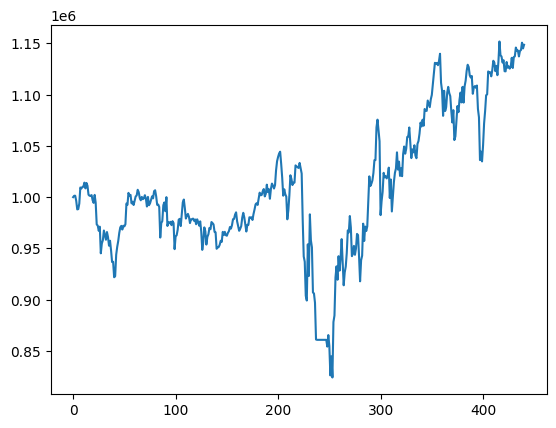

In [38]:
%matplotlib inline
df_account_value.account_value.plot()

<a id='6.1'></a>
## 7.1 BackTestStats
pass in df_account_value, this information is stored in env class


In [39]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)

==============Get Backtest Results===========
Annual return          0.082383
Cumulative returns     0.148594
Annual volatility      0.206085
Sharpe ratio           0.487972
Calmar ratio           0.390758
Stability              0.357948
Max drawdown          -0.210828
Omega ratio            1.097308
Sortino ratio          0.683934
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.764205
Daily value at risk   -0.025565
dtype: float64


In [40]:
#baseline stats
print("==============Get Baseline Stats===========")
df_dji_ = get_baseline(
        ticker="^DJI",
        start = df_account_value.loc[0,'date'],
        end = df_account_value.loc[len(df_account_value)-1,'date'])

stats = backtest_stats(df_dji_, value_col_name = 'close')

==============Get Baseline Stats===========


[*********************100%***********************]  1 of 1 completed


ValueError: Length mismatch: Expected axis has 7 elements, new values have 8 elements

In [ ]:
df_dji = pd.DataFrame()
df_dji['date'] = df_account_value['date']
df_dji['dji'] = df_dji_['close'] / df_dji_['close'][0] * env_kwargs["initial_amount"]
print("df_dji: ", df_dji)
df_dji.to_csv("df_dji.csv")
df_dji = df_dji.set_index(df_dji.columns[0])
print("df_dji: ", df_dji)
df_dji.to_csv("df_dji+.csv")

df_account_value.to_csv('df_account_value.csv')


df_dji:             date           dji
0    2022-01-03  1.000000e+06
1    2022-01-04  1.005866e+06
2    2022-01-05  9.951360e+05
3    2022-01-06  9.904718e+05
4    2022-01-07  9.903404e+05
..          ...           ...
247  2022-12-27  9.086102e+05
248  2022-12-28  8.986103e+05
249  2022-12-29  9.080428e+05
250  2022-12-30  9.060324e+05
251  2023-01-03           NaN

[252 rows x 2 columns]
df_dji:                       dji
date                    
2022-01-03  1.000000e+06
2022-01-04  1.005866e+06
2022-01-05  9.951360e+05
2022-01-06  9.904718e+05
2022-01-07  9.903404e+05
...                  ...
2022-12-27  9.086102e+05
2022-12-28  8.986103e+05
2022-12-29  9.080428e+05
2022-12-30  9.060324e+05
2023-01-03           NaN

[252 rows x 1 columns]


<a id='6.2'></a>
## 7.2 BackTestPlot

df_result_ensemble.columns:  Index(['ensemble'], dtype='object')
df_trade_date:         datadate
0    2021-10-04
1    2021-10-05
2    2021-10-06
3    2021-10-07
4    2021-10-08
..          ...
348  2023-02-22
349  2023-02-23
350  2023-02-24
351  2023-02-27
352  2023-02-28

[353 rows x 1 columns]
df_result_ensemble:                    ensemble
date                      
2022-01-03  1000000.000000
2022-01-04   999006.177890
2022-01-05   992190.375143
2022-01-06   986549.918776
2022-01-07   984951.522695
...                    ...
2022-12-27   966931.603579
2022-12-28   956294.904131
2022-12-29   964607.097342
2022-12-30   960687.624327
2023-01-03   960610.826884

[252 rows x 1 columns]
==============Compare to DJIA===========
result:                    ensemble           dji
date                                    
2022-01-03  1000000.000000  1.000000e+06
2022-01-04   999006.177890  1.005866e+06
2022-01-05   992190.375143  9.951360e+05
2022-01-06   986549.918776  9.904718e+05
2022-01-07 

<Figure size 1080x360 with 0 Axes>

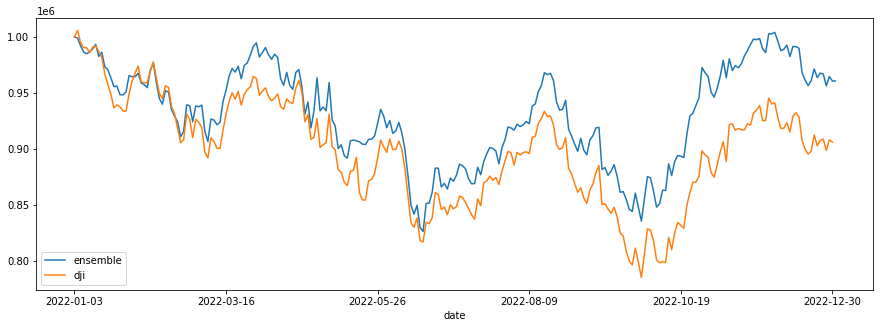

In [ ]:


# print("==============Compare to DJIA===========")
# %matplotlib inline
# # S&P 500: ^GSPC
# # Dow Jones Index: ^DJI
# # NASDAQ 100: ^NDX
# backtest_plot(df_account_value,
#               baseline_ticker = '^DJI',
#               baseline_start = df_account_value.loc[0,'date'],
#               baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])
df.to_csv("df.csv")
df_result_ensemble = pd.DataFrame({'date': df_account_value['date'], 'ensemble': df_account_value['account_value']})
df_result_ensemble = df_result_ensemble.set_index('date')

print("df_result_ensemble.columns: ", df_result_ensemble.columns)

# df_result_ensemble.drop(df_result_ensemble.columns[0], axis = 1)
print("df_trade_date: ", df_trade_date)
# df_result_ensemble['date'] = df_trade_date['datadate']
# df_result_ensemble['account_value'] = df_account_value['account_value']
df_result_ensemble.to_csv("df_result_ensemble.csv")
print("df_result_ensemble: ", df_result_ensemble)
print("==============Compare to DJIA===========")
result = pd.DataFrame()
# result = pd.merge(result, df_result_ensemble, left_index=True, right_index=True)
# result = pd.merge(result, df_dji, left_index=True, right_index=True)
result = pd.merge(df_result_ensemble, df_dji, left_index=True, right_index=True)
print("result: ", result)
result.to_csv("result.csv")
result.columns = ['ensemble', 'dji']

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
result.plot();